In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
df = pd.read_csv('pima-indians-diabetes.csv')

In [2]:
def programRequirements():
    print("Automate data")
    print("Easily reproduce analysis on different datasets")
    print("Import libraries")
    print("Research missing packages")
    print("\nWhat is AI - ")
    print("\nWhat is machine learning - ")
    print("\nWhat is deep learning - ")
    print("\nwhat is natural processing - ")
    print("Research differences between TensorFlow and PyTorch")
    print("\nWhat are they used for - ")
    print("\nList differences - ")
    print("Why would you use one over the other - ")

In [3]:
def data_analysis():
    print("\n1: Print indexes")
    print(df.index)
    print("\n2: Print columns")
    print(df.columns)
    print("\n3: Print data frame")
    print(df.head(5))
    print(df.tail(5))
    print("\n4: Print type")
    print(type(df))
    print("\n5: Print data attribute type")
    print(df.dtypes)
    print("\n6: Print values in array format")
    print(df.values)
    print("\n7: Print index of all column names")
    print(df.columns)
    print("\n8: Print data frame info")
    print("\nPrint summary stats")
    print(df.info(verbose=True))
    print("\n9: Number of rows")
    print(df.shape[0])
    print("\n10: Number of columns")
    print(df.shape[1])
    print("\n11: Number of rows and columns")
    print(df.shape)
    print("\n12: Number of elements")
    print(df.size)
    print("\n13: Cleaning data")
    all_cols = ['num_preg', 'gluc_concentrate', 'blood_press',
                'triceps', 'insulin','bmi', 'pedigree', 'age', 'class']
    
    cols_to_norm = ['num_preg', 'gluc_concentrate', 'blood_press',
                    'triceps', 'insulin','bmi', 'pedigree']
    
    df[cols_to_norm] = df[cols_to_norm].apply(
        lambda x: (x - x.min() / x.max() - x.min()))
    print("\n14: Begin tensorflow analysis - create variables")
    num_preg = tf.feature_column.numeric_column('num_preg')
    plasma_gluc = tf.feature_column.numeric_column('gluc_concentrate')
    dias_press = tf.feature_column.numeric_column('blood_press')
    tricep = tf.feature_column.numeric_column('triceps')
    insulin = tf.feature_column.numeric_column('insulin')
    bmi = tf.feature_column.numeric_column('bmi')
    diabetes_pedigree = tf.feature_column.numeric_column('pedigree')
    age = tf.feature_column.numeric_column('age')
    
    print("\n15: Creat categorical features")
    assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])
    df['age'].hist(bins=20)
    plt.legend(['Diabetes occurences per age group'])
    plt.show()
    
    print("\n16: combining features: ")
    age_groups = tf.feature_column.bucketized_column(
        age, boundaries=[20, 30, 40, 50, 60, 70, 80])
    
    feat_cols = [num_preg, plasma_gluc, dias_press,
            tricep, bmi, diabetes_pedigree, age_groups]
    
    x_data = df.drop('class', axis=1)
    labels = df['class']
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test, = train_test_split(
        x_data, labels, test_size=0.33, random_state=101)
    
    input_func =tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
    
    model = tf.estimator.LinearClassifier(
        feature_columns=feat_cols, n_classes=2)
    model.train(input_fn=input_func, steps=1000)
    
    pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, batch_size=10, num_epochs=1, shuffle=False)
    
    predictions = model.predict(pred_input_func)
    list(predictions)
    
    eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
    result = model.evaluate(eval_input_func)
    print(result)

Automate data
Easily reproduce analysis on different datasets
Import libraries
Research missing packages

What is AI - 

What is machine learning - 

What is deep learning - 

what is natural processing - 
Research differences between TensorFlow and PyTorch

What are they used for - 

List differences - 
Why would you use one over the other - 

1: Print indexes
RangeIndex(start=0, stop=768, step=1)

2: Print columns
Index(['num_preg', 'gluc_concentrate', 'blood_press', 'triceps', 'insulin',
       'bmi', 'pedigree', 'age', 'class'],
      dtype='object')

3: Print data frame
   num_preg  gluc_concentrate  blood_press  triceps  insulin   bmi  pedigree  \
0         6               148           72       35        0  33.6     0.627   
1         1                85           66       29        0  26.6     0.351   
2         8               183           64        0        0  23.3     0.672   
3         1                89           66       23       94  28.1     0.167   
4         0       

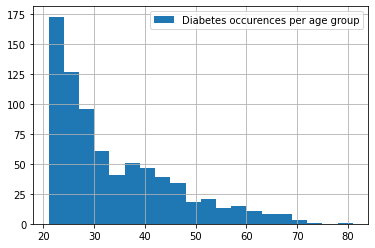


16: combining features: 


C:\Users\Mitch\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


{'accuracy': 0.71653545, 'accuracy_baseline': 0.6574803, 'auc': 0.8029458, 'auc_precision_recall': 0.6590609, 'average_loss': 0.5426601, 'label/mean': 0.34251967, 'loss': 0.54276973, 'precision': 0.57009345, 'prediction/mean': 0.44966856, 'recall': 0.7011494, 'global_step': 1000}


In [4]:
programRequirements()
data_analysis()